In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\J.S. CAITLYN
[nltk_data]     MARY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
df=pd.read_csv("train.csv")

In [6]:
class_labels  = train['label'].values.tolist()
class_labels_set = set(class_labels)

freq_list = []

for c in class_labels_set:
    freq_list.append(class_labels.count(c))

print ('Freq',freq_list)
print ('number',class_labels_set)

NameError: name 'train' is not defined

In [ ]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("darkgrid")

In [ ]:
# plot the number of samples per class
import seaborn as sns
plt.figure(figsize=(8,8))
sns.countplot(x="label", data=train)

In [ ]:
train.head()

In [ ]:
# how many null values in the dataset
print("Null values in train data:")
print(train.isnull().sum())
print('\n\n')

print("Null values in test data:")
print(test.isnull().sum())

In [ ]:
sns.heatmap(train.isnull(),cmap='YlGnBu_r')

In [ ]:
#imputing the data
test=test.fillna(' ') 
train=train.fillna(' ') 

In [ ]:
sns.heatmap(train.isnull(), cmap='YlGnBu_r')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(train['text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df1.groupby('text').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 words in dataset before removing stop words',color=['slateblue', 'blueviolet', 'violet', 'orchid', 'lightpink'])

In [5]:
# counting the number of missing values in the dataset
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
# replacing the null values with empty string
df = df.fillna('')

In [7]:
df['content']= df['author']+' '+df['title']

In [8]:
print(df['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [9]:
#separating the data & label
X=df.drop(columns='label',axis=1)
Y=df['label']

In [10]:
print(X)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [11]:
port_stem = PorterStemmer()

In [12]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [13]:
df['content'] = df['content'].apply(stemming)

In [14]:
print(df['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [15]:
#separating the data and label
X = df['content'].values
Y = df['label'].values

In [16]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [17]:
print(Y)

[1 0 1 ... 0 1 1]


In [18]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9790865384615385


In [21]:
from sklearn.ensemble import RandomForestClassifier
rmodel = RandomForestClassifier(n_estimators=100, random_state=42) 
rmodel.fit(X_train, Y_train)
X_test_prediction = rmodel.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data (Random Forest): ', test_data_accuracy)




Accuracy score of the test data (Random Forest):  0.9935096153846154


In [22]:
print(f'Accuracy score of the test data (Random Forest): {test_data_accuracy * 100:.2f}%')

Accuracy score of the test data (Random Forest): 99.35%


In [23]:
from sklearn.linear_model import PassiveAggressiveClassifier
pmodel = PassiveAggressiveClassifier(max_iter=1000, random_state=43, tol=1e-3) 
pmodel.fit(X_train, Y_train)
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9790865384615385


In [24]:
print(f'Accuracy score of the test data (Random Forest): {test_data_accuracy * 100:.2f}%')

Accuracy score of the test data (Random Forest): 97.91%


In [25]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=1)
# Fit the model
model_knn.fit(X_train, Y_train)
X_test_prediction = model_knn.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data (KNN): ', test_data_accuracy)

Accuracy score of the test data (KNN):  0.5865384615384616


In [26]:
print(f'Accuracy score of the test data (Random Forest): {test_data_accuracy * 100:.2f}%')

Accuracy score of the test data (Random Forest): 58.65%


In [27]:
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB()
model_nb.fit(X_train, Y_train)
X_test_prediction = model_nb.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data (Naive Bayes): ', test_data_accuracy)

Accuracy score of the test data (Naive Bayes):  0.9550480769230769


In [28]:
print(f'Accuracy score of the test data (Random Forest): {test_data_accuracy * 100:.2f}%')

Accuracy score of the test data (Random Forest): 95.50%


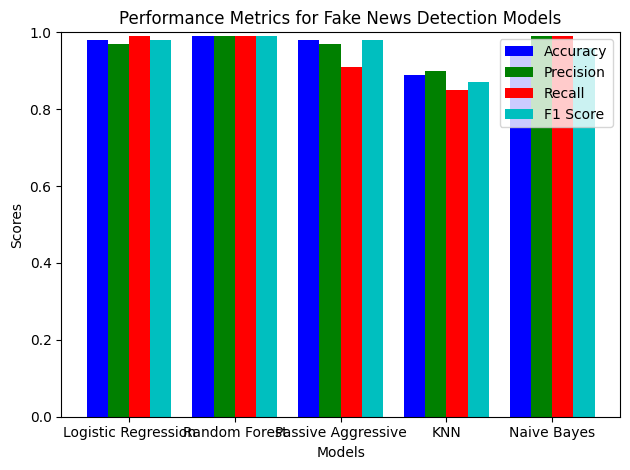

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Store the evaluation metrics for each model
models = ['Logistic Regression', 'Random Forest', 'Passive Aggressive', 'KNN', 'Naive Bayes']
accuracies = [0.98, 0.99, 0.98, 0.89, 0.96]  # Replace with your accuracy values
precisions = [0.97, 0.99, 0.97, 0.90, 0.99]  # Replace with your precision values
recalls = [0.99, 0.99, 0.91, 0.85, 0.99]  # Replace with your recall values
f1_scores = [0.98, 0.99, 0.98, 0.87, 0.96]  # Replace with your F1 score values

# Define bar width and x locations
bar_width = 0.2
x = np.arange(len(models))

# Create the bar plots
plt.bar(x - bar_width * 1.5, accuracies, width=bar_width, label='Accuracy', color='b')
plt.bar(x - bar_width / 2, precisions, width=bar_width, label='Precision', color='g')
plt.bar(x + bar_width / 2, recalls, width=bar_width, label='Recall', color='r')
plt.bar(x + bar_width * 1.5, f1_scores, width=bar_width, label='F1 Score', color='c')

# Adding titles and labels
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Metrics for Fake News Detection Models')
plt.xticks(x, models)
plt.ylim(0, 1)  # Set y-axis limit to 1
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


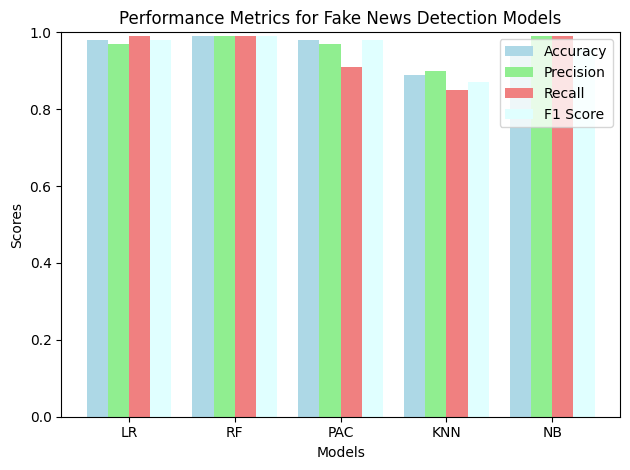

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Store the evaluation metrics for each model
models = ['LR', 'RF', 'PAC', 'KNN', 'NB']
accuracies = [0.98, 0.99, 0.98, 0.89, 0.96]  # Replace with your accuracy values
precisions = [0.97, 0.99, 0.97, 0.90, 0.99]  # Replace with your precision values
recalls = [0.99, 0.99, 0.91, 0.85, 0.99]  # Replace with your recall values
f1_scores = [0.98, 0.99, 0.98, 0.87, 0.96]  # Replace with your F1 score values

# Define bar width and x locations
bar_width = 0.2
x = np.arange(len(models))

# Create the bar plots with lighter colors
plt.bar(x - bar_width * 1.5, accuracies, width=bar_width, label='Accuracy', color='lightblue')
plt.bar(x - bar_width / 2, precisions, width=bar_width, label='Precision', color='lightgreen')
plt.bar(x + bar_width / 2, recalls, width=bar_width, label='Recall', color='lightcoral')
plt.bar(x + bar_width * 1.5, f1_scores, width=bar_width, label='F1 Score', color='lightcyan')

# Adding titles and labels
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Metrics for Fake News Detection Models')
plt.xticks(x, models)
plt.ylim(0, 1)  # Set y-axis limit to 1
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


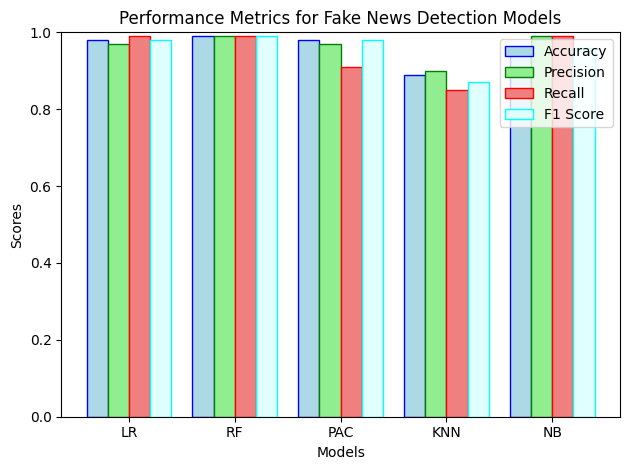

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Store the evaluation metrics for each model
models = ['LR', 'RF', 'PAC', 'KNN', 'NB']
accuracies = [0.98, 0.99, 0.98, 0.89, 0.96]  # Replace with your accuracy values
precisions = [0.97, 0.99, 0.97, 0.90, 0.99]  # Replace with your precision values
recalls = [0.99, 0.99, 0.91, 0.85, 0.99]  # Replace with your recall values
f1_scores = [0.98, 0.99, 0.98, 0.87, 0.96]  # Replace with your F1 score values

# Define bar width and x locations
bar_width = 0.2
x = np.arange(len(models))

# Create the bar plots with lighter colors and outlines
plt.bar(x - bar_width * 1.5, accuracies, width=bar_width, label='Accuracy', color='lightblue', edgecolor='blue')
plt.bar(x - bar_width / 2, precisions, width=bar_width, label='Precision', color='lightgreen', edgecolor='green')
plt.bar(x + bar_width / 2, recalls, width=bar_width, label='Recall', color='lightcoral', edgecolor='red')
plt.bar(x + bar_width * 1.5, f1_scores, width=bar_width, label='F1 Score', color='lightcyan', edgecolor='cyan')

# Adding titles and labels
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Metrics for Fake News Detection Models')
plt.xticks(x, models)
plt.ylim(0, 1)  # Set y-axis limit to 1
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
# Add a description below the plot



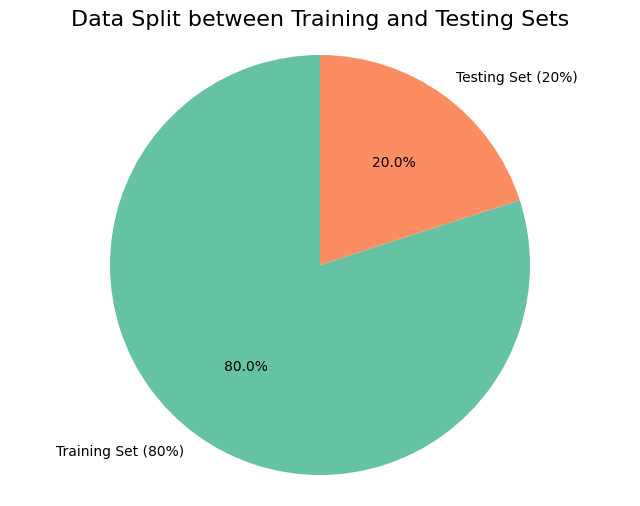

In [32]:
import matplotlib.pyplot as plt

# Assuming X and Y are your feature and target variables
# Calculate the number of samples in the dataset
total_samples = len(Y)
train_size = int(total_samples * 0.8)  # 80% for training
test_size = total_samples - train_size  # 20% for testing

# Data for the pie chart
sizes = [train_size, test_size]
labels = ['Training Set (80%)', 'Testing Set (20%)']
colors = ['#66c2a5', '#fc8d62']  # Light colors for better visualization

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add title
plt.title('Data Split between Training and Testing Sets', fontsize=16)

# Show the plot
plt.show()


Number of training samples: 16640
Number of testing samples: 4160


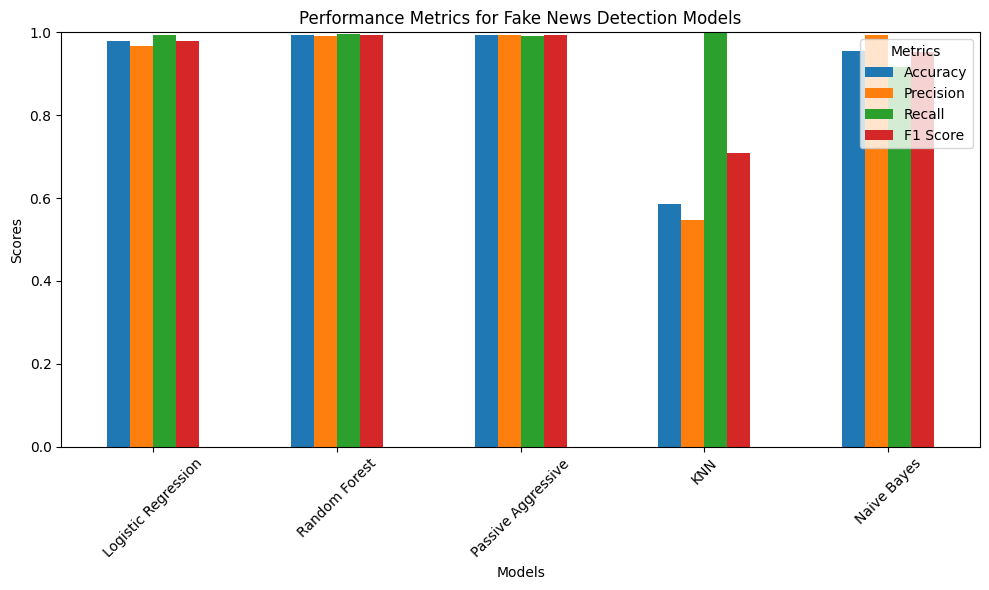

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Count number of training and testing samples
num_train_samples = X_train.shape[0]
num_test_samples = X_test.shape[0]
print(f'Number of training samples: {num_train_samples}')
print(f'Number of testing samples: {num_test_samples}')

# Store evaluation metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Function to evaluate and store metrics
def evaluate_model(model, model_name):
    model.fit(X_train, Y_train)
    X_test_prediction = model.predict(X_test)
    
    report = classification_report(Y_test, X_test_prediction, output_dict=True)
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy_score(Y_test, X_test_prediction))
    metrics['Precision'].append(report['1']['precision'])  # Assuming '1' is the label for "Fake"
    metrics['Recall'].append(report['1']['recall'])
    metrics['F1 Score'].append(report['1']['f1-score'])

# Evaluate each model
evaluate_model(model, 'Logistic Regression')
evaluate_model(rmodel, 'Random Forest')
evaluate_model(pmodel, 'Passive Aggressive')
evaluate_model(model_knn, 'KNN')
evaluate_model(model_nb, 'Naive Bayes')

# Convert metrics to DataFrame for plotting
metrics_df = pd.DataFrame(metrics)

# Plotting
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics for Fake News Detection Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.ylim(0, 1)  # Set y-axis limits to [0, 1]
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score

# Assuming you have your predictions and probabilities
y_test_pred = rmodel.predict(X_test)  # Predictions from the Random Forest model
y_test_prob = rmodel.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(Y_test, y_test_prob)

# Calculate F1 scores for different thresholds
f1_scores = [f1_score(Y_test, y_test_prob > thresh) for thresh in thresholds]

# Find the threshold that gives the maximum F1 score
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Optimal confidence threshold: {best_threshold}")

# Plotting Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='orange')
plt.plot(thresholds, f1_scores, label='F1 Score', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Threshold')
plt.legend()
plt.grid()
plt.show()
